# Project 4

In this project, you will analyze the admissions data in detail and build a model and explain it. It is more open ended so feel free to use all the various techniques that you have learnt so far. 

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np
df_raw = pd.read_csv("../assets/admissions.csv")


In [54]:
df_raw.count()
# notice 2 empty values in gre, gpa and 1 in prestige. 
# since very few, just drop those rows
df = df_raw.dropna() 
df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


### What are the predictors and dependent variable ?

In [55]:
## Predictor is admit and the rest are dependent variables

### Intro: Write a problem Statement/ Specific hypothesis you have regarding admissions?

In [56]:
## Undergraduate school prestige is the 
## most important predictor to getting admitted

### Dataset:  Find the distribution of admission, GRE, GPA and Prestige

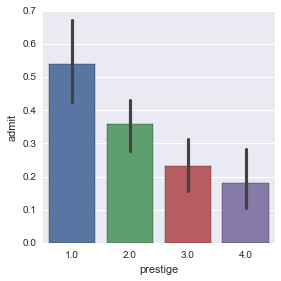

In [57]:
import seaborn as sb
%matplotlib inline
sb.factorplot(x='prestige', 
              y='admit',
              kind='bar',
              data = df)
# What this says is that prestige 1 seems to have a lot more admissions while
# prestige 4 is the opposite. Matches our hypothesis at this stage.

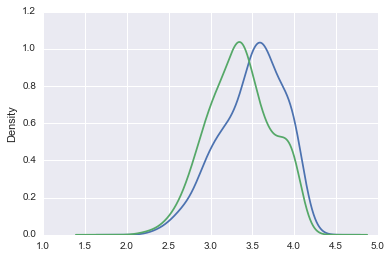

In [58]:
ax = df.gpa[df.admit==1].plot(kind='density')
df.gpa[df.admit==0].plot(kind='density',ax=ax)

# notice that the blue line (admit =1) is skewed higher
# i.e. higher gpa has higher chance of admission

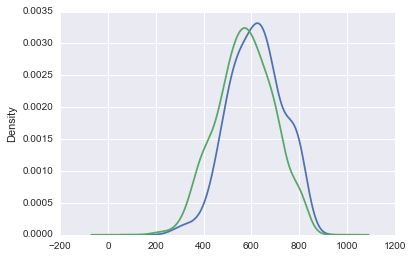

In [59]:
ax = df.gre[df.admit==1].plot(kind='density')
df.gre[df.admit==0].plot(kind='density',ax=ax)

# notice that the blue line (admit =1) is skewed higher
# i.e. higher gpa has higher chance of admission

### FInd the correlation of each feature with admission

In [60]:
df.corr()["admit"][1:]

gre         0.181202
gpa         0.174116
prestige   -0.243563
Name: admit, dtype: float64

### How do you deal with the prestige feature?

In [197]:
# Binarize it and then remember to take one out if you are using linear 
# models. This is to avoid colinearity.

from sklearn import linear_model as lm
dummy_prestige = pd.get_dummies(df.prestige,prefix="prestige")
df_with_dummy_prestige = df.join(dummy_prestige)
df_with_dummy_prestige.head()

,admit,gre,gpa,prestige,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,0,380.0,3.61,3.0,0.0,0.0,1.0,0.0
1,1,660.0,3.67,3.0,0.0,0.0,1.0,0.0
2,1,800.0,4.00,1.0,1.0,0.0,0.0,0.0
3,1,640.0,3.19,4.0,0.0,0.0,0.0,1.0
4,0,520.0,2.93,4.0,0.0,0.0,0.0,1.0


### What is the best model and that model's parameter's for predicting admission? Hint: Use GridsearchCV and define what metric you use to find what is best.

In [198]:
from sklearn import preprocessing as pp
# Remember to scale the data in order to make understanding the model 
# coeeficients easier
scaler = pp.StandardScaler().fit(df_with_dummy_prestige[features])
scaled_data = scaler.fit_transform(df_with_dummy_prestige[features])
features=[u'gre', u'gpa',u'prestige_1.0',u'prestige_2.0', u'prestige_4.0']

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'Cs': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'fit_intercept': [True, False], 'class_weight': ['balanced', None]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [200]:
clf_lm.best_estimator_ # For Logistic Regression

LogisticRegressionCV(Cs=6, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [201]:
clf_lm.best_score_ # For Logistic Regression

0.7128463476070529

In [203]:
from sklearn.ensemble import RandomForestClassifier
parameters = {'n_estimators':[10,50,100,200],'class_weight':['balanced',None]
             ,'max_depth':[5,6,7,8]}
clf_rf = grid_search.GridSearchCV(RandomForestClassifier(), parameters,
                               scoring='accuracy')
clf_rf.fit(df_with_dummy_prestige[features], df_with_dummy_prestige.admit)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 50, 100, 200], 'max_depth': [5, 6, 7, 8], 'class_weight': ['balanced', None]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [204]:
clf_rf.best_estimator_ # For Random Forest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [205]:
clf_rf.best_score_ # For Random Forest

0.7103274559193955

### Looks like Logistic Regression is a better model relative to AUC

### What is the most important feature that contributes to the students probability of admission? 

In [206]:
zip(features,clf_lm.best_estimator_.coef_[0])

[(u'gre', 0.24528851818574934),
 (u'gpa', 0.27123227648647058),
 (u'prestige_1.0', 0.43046391991441407),
 (u'prestige_2.0', 0.26754757747097263),
 (u'prestige_4.0', -0.1019757275684184)]

#### Looks like Prestige 1 is by a large margin the most important feature. Prestige 2 is next and then GPA is third.

### Visualize the model relative to prestige and GPA. HINT: Use the technique from the visualization of the flight delay model

In [216]:
df_with_dummy_prestige["lm_predict"] = clf_lm.predict_proba(scaled_data)[:,1]

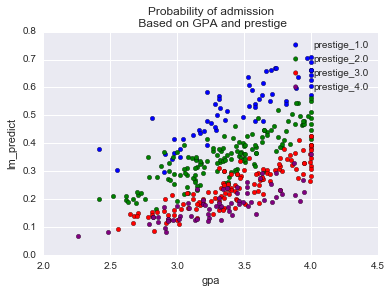

In [217]:
ax = plt.subplot(111)
prestige_features = ["prestige_1.0","prestige_2.0","prestige_3.0","prestige_4.0"]
colors = ['blue', 'green', 'red', 'purple']
for e, c in enumerate(colors):
    df_with_dummy_prestige[df_with_dummy_prestige[prestige_features[e]] == 1].plot(x='gpa', y='lm_predict', kind='scatter', color = c, ax=ax)
ax.set(title='Probability of admission\n Based on GPA and prestige')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines[:2], labels=prestige_features, loc='best')  # legend for first two lines only

### We can see that prestige 1 makes a big difference almost independently from gpa.